In [2]:
# have stack.tif file in the same directory as this file for it to work

import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt

# Load image
im = Image.open('stack.tif')

# Find no. of slices
no_frames = im.n_frames

# Create separate tif files for each slice
for i in range(no_frames):
    im.seek(i)
    im.save('page_%s.tif'%(i,))

In [37]:
%matplotlib

# create list of individual slices
images = []
for i in range(no_frames):
    temp_im = Image.open('page_%s.tif'%(i,))
    imdata = temp_im.getdata()
    x = np.reshape(imdata, (temp_im.height, temp_im.width))
    x = np.asarray(x, dtype=np.uint8)
    images.append(x)

# convert to numpy array
images_array = np.asarray(images)
np.shape(images_array) # 15, 1024, 1024
np.shape(images_array[0][0]) # 1024
type(images_array)

Using matplotlib backend: MacOSX


numpy.ndarray

In [8]:
# Danny questions - what type of image is this? does it use a colourmap or not? what are the maximum rgb values?
maxval = 0
for i in range(1024):
    for j in range(15):
        tempmax = max(images_array[j][i])
        if tempmax > maxval:
            maxval = tempmax
print(maxval)

255


In [15]:
# Create 3d axes - THIS WORKS
%matplotlib
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# check to see image has loaded into array
'''
plt.imshow(images_array[1])
plt.colorbar()
'''

Using matplotlib backend: MacOSX


'\nplt.imshow(images_array[1])\nplt.colorbar()\n'

In [36]:

# Doesn't work - should create interactive 3d plot 
x_3d,y_3d = np.ogrid[0:images_array[0].shape[0], 0:images_array[0].shape[1]]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot_surface()

TypeError: missing a required argument: 'X'

In [52]:
# Try concatenating the images in 3D
x = np.concatenate([images_array[i] for i in range(15)], axis=2) # this is the concatenation line that goes wrong. I want axis to be set to 2 so they stack in the z plane, but for some reason it doesn't work
plt.imshow(x)

AxisError: axis 2 is out of bounds for array of dimension 2

In [ ]:
# potential bugs:
# - incorrect indexing of array of slices

In [ ]:
# try rearranging stack so 1024x1024 x 15

print("shape of array = ", np.shape(images_array))
stacked = np.dstack(images_array)

print("shape of new array = ", np.shape(stacked))

In [ ]:
%matplotlib
from matplotlib import colors

plt.subplot(1,1,1)
slice1 = stacked[..., 0]
plt.imshow(slice1, cmap='gray', norm=colors.NoNorm()) 

In [33]:
np.shape(slice1)

(1024, 1024)

In [58]:
# Try the red channel images

# have Rchannel-stack-1.tif file in the same directory as this file for it to work

import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt

# Load image
im = Image.open('Rchannel-stack-1.tif')

# Find no. of slices
no_frames = im.n_frames

# Create separate tif files for each slice
for i in range(no_frames):
    im.seek(i)
    im.save('Redpage_%s.tif'%(i,))

In [59]:
%matplotlib inline

# create list of individual slices of Red stack
Rimages = []
for i in range(no_frames):
    temp_im = Image.open('Redpage_%s.tif'%(i,))
    imdata = temp_im.getdata()
    x = np.reshape(imdata, (temp_im.height, temp_im.width))
    x = np.asarray(x, dtype=np.uint8)
    Rimages.append(x)

# convert to numpy array
Rimages_array = np.asarray(Rimages)
np.shape(Rimages_array) # 15, 1024, 1024

(5, 1024, 1024)

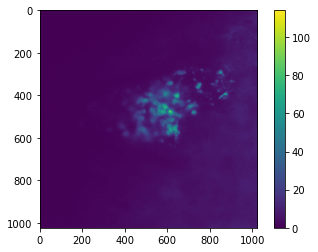

In [67]:
# Try showing a single image slice
plt.imshow(Rimages_array[1])
plt.colorbar()
# still showing blue even if we use the red channel that has been isolated in imagej. imagej says lookup table is red for red channel imgs

The colormap data: (768,)


array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00392157],
       [0.        , 0.00392157, 0.00784314],
       [0.        , 0.00784314, 0.01176471],
       [0.        , 0.01176471, 0.01568627],
       [0.        , 0.01568627, 0.01960784],
       [0.        , 0.01568627, 0.02352941],
       [0.        , 0.01960784, 0.02745098],
       [0.        , 0.02352941, 0.03137255],
       [0.        , 0.02745098, 0.03529412],
       [0.        , 0.03137255, 0.03921569],
       [0.        , 0.03137255, 0.04313725],
       [0.        , 0.03529412, 0.04705882],
       [0.        , 0.03921569, 0.05098039],
       [0.        , 0.04313725, 0.05490196],
       [0.        , 0.04705882, 0.05882353],
       [0.        , 0.04705882, 0.0627451 ],
       [0.        , 0.05098039, 0.06666667],
       [0.        , 0.05490196, 0.07058824],
       [0.        , 0.05882353, 0.0745098 ],
       [0.        , 0.0627451 , 0.07843137],
       [0.        , 0.0627451 , 0.08235294],
       [0.

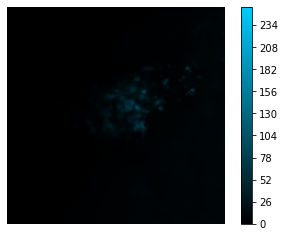

In [12]:
# go from here to investigate colourmap data
# use dir(variable) to find data and attributes associated with that image
# idea - reshape the array into the number of channels
from PIL import Image
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
imageObj = Image.open('stack.tif')
cmapdata = imageObj.getpalette()
imdata = imageObj.getdata()
print("The colormap data:", np.shape(cmapdata))
dir(imageObj)
cmapNx3 = np.reshape(cmapdata,(256,3), order='C')
cmapNx3n = np.asarray(cmapNx3, dtype=float)/255.0
cmap = colors.ListedColormap(cmapNx3n, name='stack_colormap')
plt.imshow(imageObj, cmap=cmap, norm=colors.NoNorm())
plt.colorbar()
plt.axis('Off')
cmapNx3n